In [1]:
import pandas_datareader as pdr

In [2]:
key='2be0017e6abac71f587330eee449fd2a949a3e8c'
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df= pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-16 00:00:00+00:00,128.51,128.57,127.35,127.74,36222447,118.424972,118.480264,117.356005,117.715399,36222447,0.0,1.0
1,AAPL,2015-07-17 00:00:00+00:00,129.62,129.62,128.31,129.08,46164710,119.447863,119.447863,118.240668,118.950241,46164710,0.0,1.0
2,AAPL,2015-07-20 00:00:00+00:00,132.07,132.97,130.70,130.97,58900203,121.705596,122.534967,120.443109,120.691920,58900203,0.0,1.0
3,AAPL,2015-07-21 00:00:00+00:00,130.75,132.92,130.32,132.85,76756427,120.489185,122.488891,120.092930,122.424384,76756427,0.0,1.0
4,AAPL,2015-07-22 00:00:00+00:00,125.22,125.50,121.99,121.99,115450607,115.393160,115.651187,112.416640,112.416640,115450607,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-07-07 00:00:00+00:00,372.69,378.62,372.23,375.41,28207000,372.69,378.62,372.23,375.41,28207000,0.0,1.0
1253,AAPL,2020-07-08 00:00:00+00:00,381.37,381.50,376.36,376.72,29274500,381.37,381.50,376.36,376.72,29274500,0.0,1.0
1254,AAPL,2020-07-09 00:00:00+00:00,383.01,385.27,378.69,385.05,31420400,383.01,385.27,378.69,385.05,31420400,0.0,1.0
1255,AAPL,2020-07-10 00:00:00+00:00,383.68,383.92,378.82,381.34,22564300,383.68,383.92,378.82,381.34,22564300,0.0,1.0
1256,AAPL,2020-07-13 00:00:00+00:00,381.91,399.82,381.03,389.06,47913100,381.91,399.82,381.03,389.06,47913100,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1.shape

(1257,)

In [10]:
df1

0       128.51
1       129.62
2       132.07
3       130.75
4       125.22
         ...  
1252    372.69
1253    381.37
1254    383.01
1255    383.68
1256    381.91
Name: close, Length: 1257, dtype: float64

In [11]:
import matplotlib.pyplot as plt

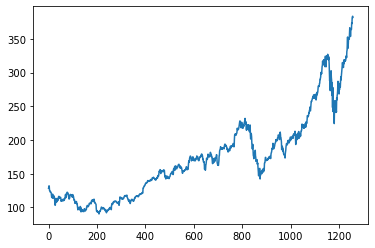

In [12]:
plt.plot(df1);

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1257, 1)

In [17]:
df1

array([[0.13012204],
       [0.13390605],
       [0.14225813],
       ...,
       [0.99771596],
       [1.        ],
       [0.99396605]])

In [18]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[:training_size,:], df1[training_size:len(df1),:1]

In [19]:
train_data.shape, test_data.shape

((817, 1), (440, 1))

In [20]:
import numpy as np

def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(X_train)

[[0.13012204 0.13390605 0.14225813 ... 0.08842981 0.08474807 0.0978046 ]
 [0.13390605 0.14225813 0.13775823 ... 0.08474807 0.0978046  0.09524784]
 [0.14225813 0.13775823 0.11890639 ... 0.0978046  0.09524784 0.09507738]
 ...
 [0.32760619 0.33353787 0.32948115 ... 0.47364833 0.48315947 0.4692507 ]
 [0.33353787 0.32948115 0.32716302 ... 0.48315947 0.4692507  0.45663735]
 [0.32948115 0.32716302 0.33166292 ... 0.4692507  0.45663735 0.45486466]]


In [23]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(339, 100) (339,)
(716, 100) (716,)


In [24]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=64, verbose=1)                                

Epoch 1/100
12/12 [==============================] - 5s 446ms/step - loss: 0.0137 - val_loss: 0.0516
Epoch 2/100
12/12 [==============================] - 3s 270ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 3/100
12/12 [==============================] - 3s 255ms/step - loss: 6.9865e-04 - val_loss: 0.0056
Epoch 4/100
12/12 [==============================] - 3s 261ms/step - loss: 5.0746e-04 - val_loss: 0.0031
Epoch 5/100
12/12 [==============================] - 3s 257ms/step - loss: 4.2685e-04 - val_loss: 0.0031
Epoch 6/100
12/12 [==============================] - 3s 257ms/step - loss: 3.9536e-04 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 3s 257ms/step - loss: 4.1483e-04 - val_loss: 0.0028
Epoch 8/100
12/12 [==============================] - 3s 262ms/step - loss: 4.2269e-04 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 3s 252ms/step - loss: 4.1447e-04 - val_loss: 0.0028
Epoch 10/100
12/12 [==============================] - 3s 259ms/

12/12 [==============================] - 3s 271ms/step - loss: 2.3052e-04 - val_loss: 0.0012
Epoch 79/100
12/12 [==============================] - 3s 275ms/step - loss: 2.5252e-04 - val_loss: 0.0022
Epoch 80/100
12/12 [==============================] - 3s 275ms/step - loss: 2.1084e-04 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 3s 264ms/step - loss: 2.4999e-04 - val_loss: 0.0021
Epoch 82/100
12/12 [==============================] - 3s 257ms/step - loss: 2.1472e-04 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 3s 264ms/step - loss: 1.8993e-04 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 3s 259ms/step - loss: 1.6414e-04 - val_loss: 9.5854e-04
Epoch 85/100
12/12 [==============================] - 3s 258ms/step - loss: 1.6614e-04 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 3s 256ms/step - loss: 1.5655e-04 - val_loss: 8.6401e-04
Epoch 87/100
12/12 [==============================]

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [31]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error
print("Training error", math.sqrt(mean_squared_error(y_train, train_predict))) 
print("Testing error", math.sqrt(mean_squared_error(y_test, test_predict)))

Training error 147.77625546377809
Testing error 254.8831583299291


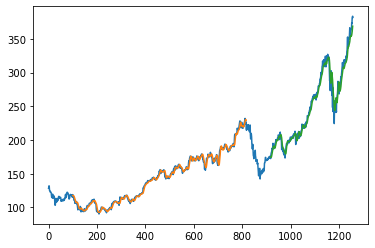

In [36]:
lookback = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lookback*2)+1 : len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [49]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [51]:
temp_input

[0.783936728710711,
 0.7592213813322425,
 0.7085293516056453,
 0.6740983159473647,
 0.6896775073293787,
 0.6244630803845366,
 0.6239176382354946,
 0.7106770300674984,
 0.6783254926024408,
 0.7240744528533442,
 0.6905979409558873,
 0.677336878707302,
 0.5994068316629168,
 0.6647576191450193,
 0.6309742960387263,
 0.5382491307015749,
 0.6396331901547693,
 0.5177268698438672,
 0.5540328628894797,
 0.5329310697484146,
 0.5264880343628553,
 0.4735119656371446,
 0.45691007022567665,
 0.5336469625690324,
 0.5290107043021749,
 0.5730551578373217,
 0.5365787141201336,
 0.5606804390809299,
 0.5589077520965432,
 0.5132951523829004,
 0.5269993863775823,
 0.5149996590986567,
 0.586793481966319,
 0.5764300811345197,
 0.5990659303197654,
 0.6056112361082702,
 0.6235426467580282,
 0.6705870321129065,
 0.6616554169223426,
 0.6693597872775617,
 0.6560987250289766,
 0.6360878161859957,
 0.6069066612122451,
 0.63325833503784,
 0.6296106906661211,
 0.6566782573123339,
 0.6573600599986363,
 0.64171268834799

In [52]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9669072]
101
1 day input [0.75922138 0.70852935 0.67409832 0.68967751 0.62446308 0.62391764
 0.71067703 0.67832549 0.72407445 0.69059794 0.67733688 0.59940683
 0.66475762 0.6309743  0.53824913 0.63963319 0.51772687 0.55403286
 0.53293107 0.52648803 0.47351197 0.45691007 0.53364696 0.5290107
 0.57305516 0.53657871 0.56068044 0.55890775 0.51329515 0.52699939
 0.51499966 0.58679348 0.57643008 0.59906593 0.60561124 0.62354265
 0.67058703 0.66165542 0.66935979 0.65609873 0.63608782 0.60690666
 0.63325834 0.62961069 0.65667826 0.65736006 0.64171269 0.67290516
 0.69359787 0.67747324 0.6914161  0.70641576 0.71688143 0.72748347
 0.74926706 0.76590305 0.7536306  0.74081271 0.74725574 0.74101725
 0.7657326  0.75952819 0.78028908 0.77217563 0.77913002 0.77176655
 0.77647099 0.77694825 0.77589146 0.7892207  0.79430013 0.80036817
 0.79082294 0.82211768 0.82879935 0.86469626 0.89486603 0.83711734
 0.84700348 0.86128724 0.89227518 0.89060476 0.89108202 0.8842299
 0.91542238 0.94153542 0.9194791  0.

8 day output [[0.902636]]
9 day input [0.72407445 0.69059794 0.67733688 0.59940683 0.66475762 0.6309743
 0.53824913 0.63963319 0.51772687 0.55403286 0.53293107 0.52648803
 0.47351197 0.45691007 0.53364696 0.5290107  0.57305516 0.53657871
 0.56068044 0.55890775 0.51329515 0.52699939 0.51499966 0.58679348
 0.57643008 0.59906593 0.60561124 0.62354265 0.67058703 0.66165542
 0.66935979 0.65609873 0.63608782 0.60690666 0.63325834 0.62961069
 0.65667826 0.65736006 0.64171269 0.67290516 0.69359787 0.67747324
 0.6914161  0.70641576 0.71688143 0.72748347 0.74926706 0.76590305
 0.7536306  0.74081271 0.74725574 0.74101725 0.7657326  0.75952819
 0.78028908 0.77217563 0.77913002 0.77176655 0.77647099 0.77694825
 0.77589146 0.7892207  0.79430013 0.80036817 0.79082294 0.82211768
 0.82879935 0.86469626 0.89486603 0.83711734 0.84700348 0.86128724
 0.89227518 0.89060476 0.89108202 0.8842299  0.91542238 0.94153542
 0.9194791  0.93577419 0.89755915 0.92534261 0.93563783 0.93328561
 0.93328561 0.9664894  0.

18 day output [[0.89652014]]
19 day input [0.53293107 0.52648803 0.47351197 0.45691007 0.53364696 0.5290107
 0.57305516 0.53657871 0.56068044 0.55890775 0.51329515 0.52699939
 0.51499966 0.58679348 0.57643008 0.59906593 0.60561124 0.62354265
 0.67058703 0.66165542 0.66935979 0.65609873 0.63608782 0.60690666
 0.63325834 0.62961069 0.65667826 0.65736006 0.64171269 0.67290516
 0.69359787 0.67747324 0.6914161  0.70641576 0.71688143 0.72748347
 0.74926706 0.76590305 0.7536306  0.74081271 0.74725574 0.74101725
 0.7657326  0.75952819 0.78028908 0.77217563 0.77913002 0.77176655
 0.77647099 0.77694825 0.77589146 0.7892207  0.79430013 0.80036817
 0.79082294 0.82211768 0.82879935 0.86469626 0.89486603 0.83711734
 0.84700348 0.86128724 0.89227518 0.89060476 0.89108202 0.8842299
 0.91542238 0.94153542 0.9194791  0.93577419 0.89755915 0.92534261
 0.93563783 0.93328561 0.93328561 0.9664894  0.96253494 0.99212518
 0.99771596 1.         0.99396605 0.9669072  0.96382934 0.95535296
 0.94473499 0.93394333

26 day output [[0.89081687]]
27 day input [0.56068044 0.55890775 0.51329515 0.52699939 0.51499966 0.58679348
 0.57643008 0.59906593 0.60561124 0.62354265 0.67058703 0.66165542
 0.66935979 0.65609873 0.63608782 0.60690666 0.63325834 0.62961069
 0.65667826 0.65736006 0.64171269 0.67290516 0.69359787 0.67747324
 0.6914161  0.70641576 0.71688143 0.72748347 0.74926706 0.76590305
 0.7536306  0.74081271 0.74725574 0.74101725 0.7657326  0.75952819
 0.78028908 0.77217563 0.77913002 0.77176655 0.77647099 0.77694825
 0.77589146 0.7892207  0.79430013 0.80036817 0.79082294 0.82211768
 0.82879935 0.86469626 0.89486603 0.83711734 0.84700348 0.86128724
 0.89227518 0.89060476 0.89108202 0.8842299  0.91542238 0.94153542
 0.9194791  0.93577419 0.89755915 0.92534261 0.93563783 0.93328561
 0.93328561 0.9664894  0.96253494 0.99212518 0.99771596 1.
 0.99396605 0.9669072  0.96382934 0.95535296 0.94473499 0.93394333
 0.92399073 0.91535181 0.90822124 0.90263599 0.89853162 0.89576751
 0.89415145 0.8934592  0.893

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [54]:
len(df1)

1257

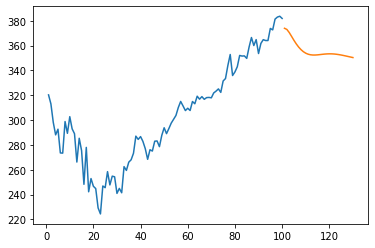

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

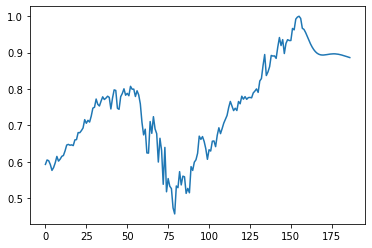

In [66]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

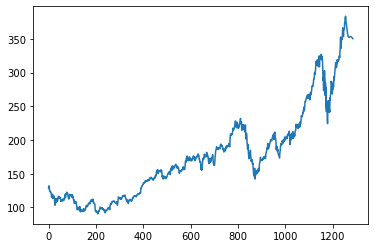

In [57]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)


In [59]:
len(lst_output)

30

In [60]:
lst_output

[[0.9669072031974792],
 [0.9638293385505676],
 [0.9553529620170593],
 [0.9447349905967712],
 [0.9339433312416077],
 [0.9239907264709473],
 [0.9153518080711365],
 [0.9082212448120117],
 [0.9026359915733337],
 [0.8985316157341003],
 [0.8957675099372864],
 [0.8941514492034912],
 [0.8934592008590698],
 [0.8934544920921326],
 [0.8939066529273987],
 [0.8946039080619812],
 [0.8953633904457092],
 [0.8960385918617249],
 [0.8965201377868652],
 [0.896737277507782],
 [0.8966531753540039],
 [0.8962620496749878],
 [0.8955814838409424],
 [0.8946471810340881],
 [0.8935063481330872],
 [0.8922117352485657],
 [0.890816867351532],
 [0.8893716335296631],
 [0.8879197239875793],
 [0.8864973783493042]]